In [1]:
from util import clean_storage_folder
clean_storage_folder.clean_storage('storage')

In [2]:
from data.generate_frame import FrameGenerator as FG
fg = FG('config/config.ini', 'storage')
fg.run()

100%|██████████| 512/512 [00:17<00:00, 29.95it/s]


KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET


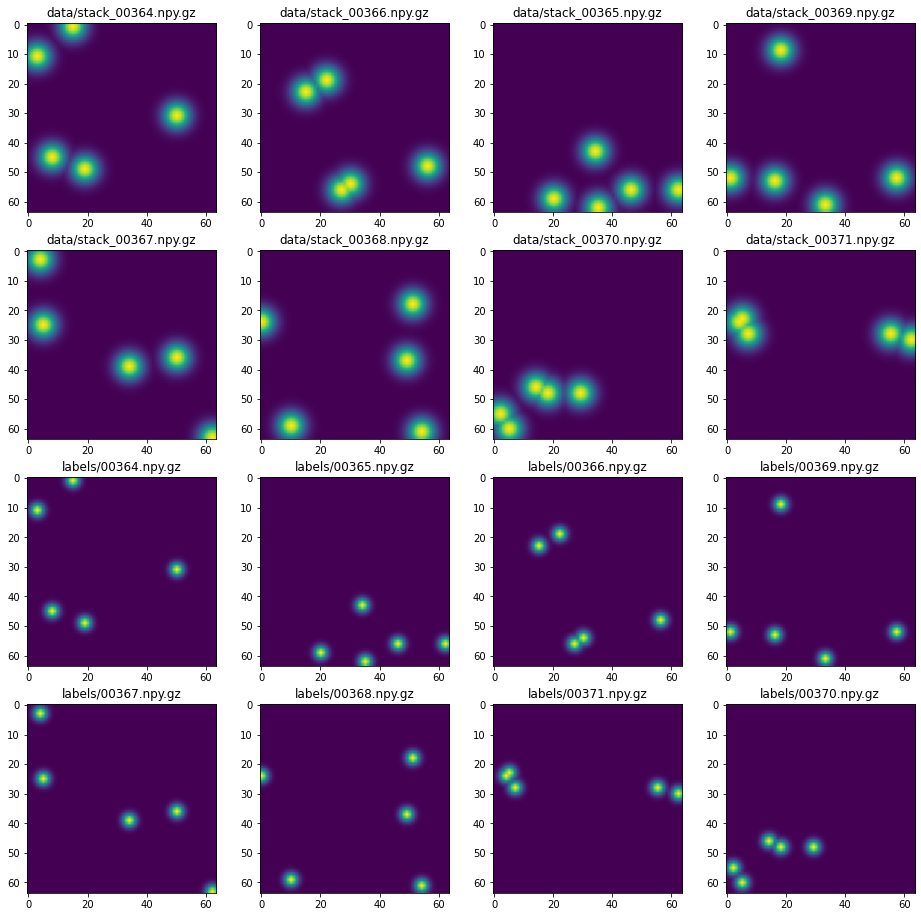

In [3]:
from train import Model
M = Model('storage', 'config/config.ini')
M.print_img('training')
M.print_img('validation')
M.print_img('evaluation')

In [4]:
history = M.fit_model()

KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET
Building model... 

  9%|▉         | 96/1024 [00:00<00:00, 957.87it/s]Compiling model... 

Loading data from storage... 

 10%|▉         | 99/1024 [00:00<00:00, 981.42it/s]Loading labels from storage... 

 10%|█         | 53/512 [00:00<00:00, 526.02it/s]Defining training data generator... 

Loading data from storage... 

 11%|█         | 56/512 [00:00<00:00, 556.47it/s]Loading labels from storage... 

100%|██████████| 512/512 [00:00<00:00, 524.69it/s]
Defining validation data generator... 

Fitting model with validation generator... 

Fitting model with data from generator... 

Epoch 1/20
32/32 [==============================] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00001: val_loss improved from inf to 0.00891, saving model to ./output/checkpoints/cp-0001.ckpt
32/32 [==============================] - 42s 1s/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 2

In [5]:
M._load_from_checkpoint('output/checkpoints')

Building model... 



 10%|▉         | 98/1024 [00:00<00:00, 972.80it/s]Loading data from storage... 

 11%|█         | 54/512 [00:00<00:00, 534.52it/s]Loading scatterer_positions from storage... 

 12%|█▏        | 60/512 [00:00<00:00, 592.26it/s]Loading data from storage... 

 12%|█▏        | 59/512 [00:00<00:00, 580.45it/s]Loading scatterer_positions from storage... 

100%|██████████| 512/512 [00:00<00:00, 543.69it/s]


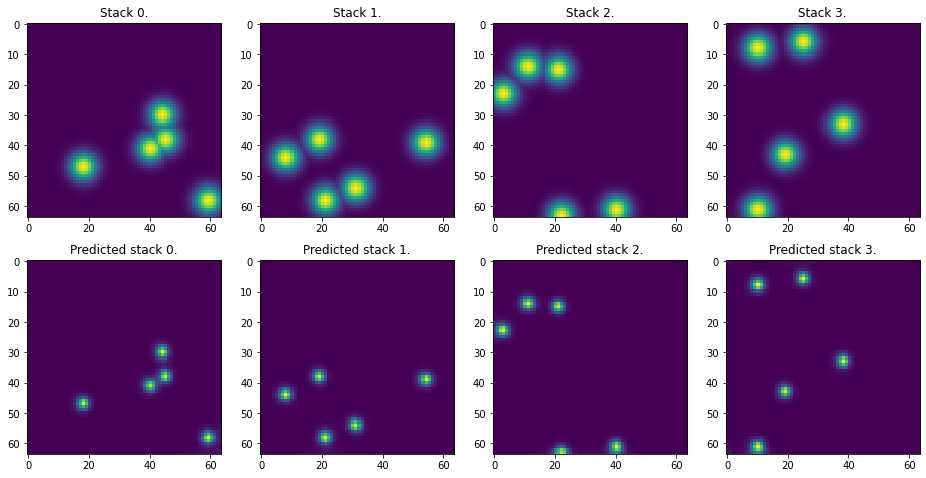

In [6]:
M.compare_predict('training')
M.compare_predict('validation')
M.compare_predict('evaluation')

In [7]:
b, p, s = M.predict('training')
from eval.evaluate import Evaluator as E
ev = E(M.config, p, b, s)

  9%|▉         | 97/1024 [00:00<00:00, 968.66it/s]Loading data from storage... 

100%|██████████| 1024/1024 [00:01<00:00, 946.04it/s]


In [8]:
msk, corr, acc = ev.evaluate()

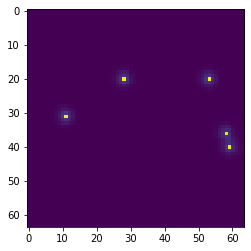

In [9]:
import matplotlib.pyplot as plt
plt.imshow(corr[0,:,:])
#plt.savefig('output/center.png')

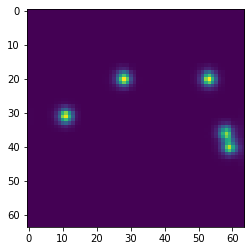

In [10]:
plt.imshow(p[0,:,:])
#plt.savefig('output/pred.png')

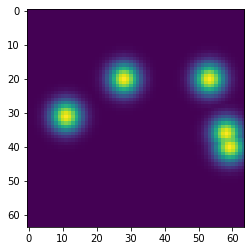

In [11]:
plt.imshow(b[0,:,:])
#plt.savefig('output/data.png')

M.train_X = M.loader.load_array_folder(
                    source_path = os.path.join(M.train_path,'data'),
                    type_of_data = 'data'
                )
                
M.train_Y = M.loader.load_array_folder(
                    source_path = os.path.join(M.train_path, 'labels'),
                    type_of_data = 'labels',
                    size_ratio = M.config['PREPROCESS_TRAIN'].getint('SizeRatio')
                )
                
M.train_generator = M.generator(
                    'training',
                    M.train_X,
                    M.train_Y
                )

os.path.join(M.train_path,'data')

import matplotlib.pyplot as plt
from tqdm import tqdm
for i in range(3):
    x_b, y_b = next(M.train_generator)
    for j in tqdm(range(len(x_b))):
        plt.imshow(x_b[j])
        plt.savefig(f'output/test_img/x_{i}_{j}.png')
        plt.close()
        plt.imshow(y_b[j])
        plt.savefig(f'output/test_img/y_{i}_{j}.png')
        plt.close()

import matplotlib.pyplot as plt
from tqdm import tqdm
for j in tqdm(range(M.train_X.shape[0])):
    plt.imshow(M.train_X[j])
    plt.savefig(f'output/test_img/x_{j}.png')
    plt.close()
    plt.imshow(M.train_Y[j])
    plt.savefig(f'output/test_img/y_{j}.png')
    plt.close()

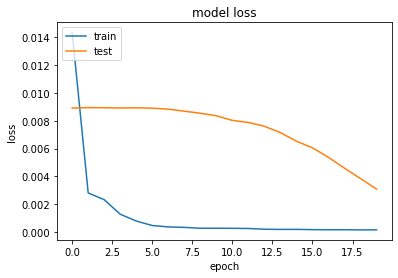

In [12]:
M.illustrate_history(history)

In [13]:
acc

0.91875